<a href="https://colab.research.google.com/github/benvictoria21/AnalyzeStocks/blob/master/Bitcoin_INR_(BTCINR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!sudo pip install  yfinance

In [11]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import pandas_datareader
import sqlite3

In [14]:
BTCINR = pd.read_csv("https://query1.finance.yahoo.com/v7/finance/download/BTC-INR?period1=1572625624&period2=1604251624&interval=1d&events=history&includeAdjustedClose=true")

BTCINR

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-11-01,6.525896e+05,6.558354e+05,6.456814e+05,6.548064e+05,6.548064e+05,1719877376668
1,2019-11-02,6.547130e+05,6.613201e+05,6.523004e+05,6.575988e+05,6.575988e+05,1498078318255
2,2019-11-03,6.576036e+05,6.614838e+05,6.446603e+05,6.512967e+05,6.512967e+05,1490288718622
3,2019-11-04,6.513144e+05,6.728532e+05,6.506562e+05,6.663095e+05,6.663095e+05,1852566487807
4,2019-11-05,6.663373e+05,6.693251e+05,6.551362e+05,6.611940e+05,6.611940e+05,1854141058838
...,...,...,...,...,...,...,...
362,2020-10-28,1.007753e+06,1.019734e+06,9.579766e+05,9.846166e+05,9.846166e+05,2661050189792
363,2020-10-29,9.846176e+05,1.012870e+06,9.664855e+05,9.981996e+05,9.981996e+05,4196924078908
364,2020-10-30,9.981988e+05,1.016996e+06,9.800918e+05,1.010758e+06,1.010758e+06,2281802563610
365,2020-10-31,1.010759e+06,1.046699e+06,1.004118e+06,1.028253e+06,1.028253e+06,2261282224699


In [15]:
BTCINR.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-11-01,652589.5625,655835.3750,645681.4375,654806.4375,654806.4375,1719877376668
1,2019-11-02,654713.0000,661320.1250,652300.4375,657598.7500,657598.7500,1498078318255
2,2019-11-03,657603.6250,661483.7500,644660.3125,651296.6875,651296.6875,1490288718622
3,2019-11-04,651314.4375,672853.1875,650656.1875,666309.5000,666309.5000,1852566487807
4,2019-11-05,666337.3125,669325.1250,655136.2500,661194.0000,661194.0000,1854141058838


In [16]:
BTCINR.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
362,2020-10-28,1.007753e+06,1.019734e+06,9.579766e+05,9.846166e+05,9.846166e+05,2661050189792
363,2020-10-29,9.846176e+05,1.012870e+06,9.664855e+05,9.981996e+05,9.981996e+05,4196924078908
364,2020-10-30,9.981988e+05,1.016996e+06,9.800918e+05,1.010758e+06,1.010758e+06,2281802563610
365,2020-10-31,1.010759e+06,1.046699e+06,1.004118e+06,1.028253e+06,1.028253e+06,2261282224699
366,2020-11-01,1.032152e+06,1.034272e+06,1.016866e+06,1.030111e+06,1.030111e+06,1756740714496


In [17]:
BTCINR.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3.670000e+02,3.670000e+02,3.670000e+02,3.670000e+02,3.670000e+02,3.670000e+02
mean,6.777466e+05,6.900846e+05,6.656777e+05,6.787738e+05,6.787738e+05,2.153035e+12
std,1.301525e+05,1.306428e+05,1.306955e+05,1.314711e+05,1.314711e+05,8.216717e+11
min,3.717216e+05,3.973455e+05,3.099744e+05,3.700086e+05,3.700086e+05,9.176897e+11
25%,5.729218e+05,5.808580e+05,5.587006e+05,5.731888e+05,5.731888e+05,1.509377e+12
50%,6.865365e+05,6.963683e+05,6.788011e+05,6.869172e+05,6.869172e+05,1.942217e+12
75%,7.567732e+05,7.727087e+05,7.425922e+05,7.600864e+05,7.600864e+05,2.659523e+12
max,1.032152e+06,1.046699e+06,1.016866e+06,1.030111e+06,1.030111e+06,5.484561e+12


In [18]:
BTCINR.info

<bound method DataFrame.info of            Date          Open  ...     Adj Close         Volume
0    2019-11-01  6.525896e+05  ...  6.548064e+05  1719877376668
1    2019-11-02  6.547130e+05  ...  6.575988e+05  1498078318255
2    2019-11-03  6.576036e+05  ...  6.512967e+05  1490288718622
3    2019-11-04  6.513144e+05  ...  6.663095e+05  1852566487807
4    2019-11-05  6.663373e+05  ...  6.611940e+05  1854141058838
..          ...           ...  ...           ...            ...
362  2020-10-28  1.007753e+06  ...  9.846166e+05  2661050189792
363  2020-10-29  9.846176e+05  ...  9.981996e+05  4196924078908
364  2020-10-30  9.981988e+05  ...  1.010758e+06  2281802563610
365  2020-10-31  1.010759e+06  ...  1.028253e+06  2261282224699
366  2020-11-01  1.032152e+06  ...  1.030111e+06  1756740714496

[367 rows x 7 columns]>

In [19]:
BTCINR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       367 non-null    object 
 1   Open       367 non-null    float64
 2   High       367 non-null    float64
 3   Low        367 non-null    float64
 4   Close      367 non-null    float64
 5   Adj Close  367 non-null    float64
 6   Volume     367 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 20.2+ KB


In [21]:
conn = sqlite3.connect("BTCINR.db")
c = conn.cursor()

In [22]:
conn = sqlite3.connect("BTCINR.db")
c = conn.cursor()

In [23]:
BTCINR.to_sql("BTCINR", conn, if_exists='replace')

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:2615: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


In [24]:
#See data
c.execute("""SELECT * FROM BTCINR""")
rows = c.fetchall()
rows

[(0,
  '2019-11-01',
  652589.5625,
  655835.375,
  645681.4375,
  654806.4375,
  654806.4375,
  1719877376668),
 (1,
  '2019-11-02',
  654713.0,
  661320.125,
  652300.4375,
  657598.75,
  657598.75,
  1498078318255),
 (2,
  '2019-11-03',
  657603.625,
  661483.75,
  644660.3125,
  651296.6875,
  651296.6875,
  1490288718622),
 (3,
  '2019-11-04',
  651314.4375,
  672853.1875,
  650656.1875,
  666309.5,
  666309.5,
  1852566487807),
 (4,
  '2019-11-05',
  666337.3125,
  669325.125,
  655136.25,
  661194.0,
  661194.0,
  1854141058838),
 (5,
  '2019-11-06',
  661076.3125,
  669144.0625,
  660812.5625,
  664716.0625,
  664716.0625,
  1642737868843),
 (6,
  '2019-11-07',
  664113.4375,
  665602.125,
  653799.5625,
  658432.4375,
  658432.4375,
  1612794170575),
 (7,
  '2019-11-08',
  658276.625,
  661861.75,
  626371.3125,
  628466.0,
  628466.0,
  1736819241631),
 (8,
  '2019-11-09',
  628793.5,
  634671.3125,
  627629.625,
  629087.0625,
  629087.0625,
  1254709916758),
 (9,
  '2019-11

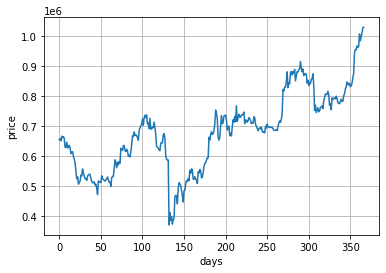

In [26]:
plt.xlabel("days")         
plt.ylabel("price")    
plt.grid()              
plt.plot(BTCINR.Close)

In [27]:
BTCINR.Date

0      2019-11-01
1      2019-11-02
2      2019-11-03
3      2019-11-04
4      2019-11-05
          ...    
362    2020-10-28
363    2020-10-29
364    2020-10-30
365    2020-10-31
366    2020-11-01
Name: Date, Length: 367, dtype: object

In [28]:
BTCINR.High

0      6.558354e+05
1      6.613201e+05
2      6.614838e+05
3      6.728532e+05
4      6.693251e+05
           ...     
362    1.019734e+06
363    1.012870e+06
364    1.016996e+06
365    1.046699e+06
366    1.034272e+06
Name: High, Length: 367, dtype: float64

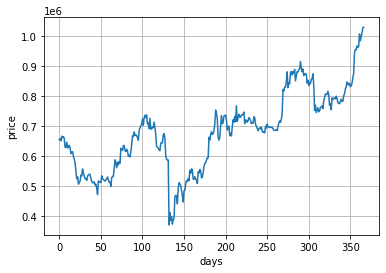

In [29]:
plt.xlabel("days")        
plt.ylabel("price")   
plt.grid()              
plt.plot(BTCINR.Close)

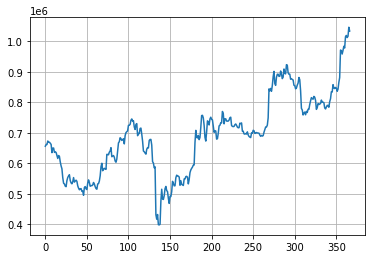

In [30]:
plt.plot(BTCINR.High)
plt.grid()

In [31]:
BTCINR.Open

0      6.525896e+05
1      6.547130e+05
2      6.576036e+05
3      6.513144e+05
4      6.663373e+05
           ...     
362    1.007753e+06
363    9.846176e+05
364    9.981988e+05
365    1.010759e+06
366    1.032152e+06
Name: Open, Length: 367, dtype: float64

In [33]:
print(len(BTCINR.Close))

367
